In [ ]:
from google.colab import files
files.upload()

Saving pima-data.csv to pima-data.csv


{'pima-data.csv': b'num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes\n6,148,72,35,0,33.6,0.627,50,1.379,TRUE\n1,85,66,29,0,26.6,0.351,31,1.1426,FALSE\n8,183,64,0,0,23.3,0.672,32,0,TRUE\n1,89,66,23,94,28.1,0.167,21,0.9062,FALSE\n0,137,40,35,168,43.1,2.288,33,1.379,TRUE\n5,116,74,0,0,25.6,0.201,30,0,FALSE\n3,78,50,32,88,31,0.248,26,1.2608,TRUE\n10,115,0,0,0,35.3,0.134,29,0,FALSE\n2,197,70,45,543,30.5,0.158,53,1.773,TRUE\n8,125,96,0,0,0,0.232,54,0,TRUE\n4,110,92,0,0,37.6,0.191,30,0,FALSE\n10,168,74,0,0,38,0.537,34,0,TRUE\n10,139,80,0,0,27.1,1.441,57,0,FALSE\n1,189,60,23,846,30.1,0.398,59,0.9062,TRUE\n5,166,72,19,175,25.8,0.587,51,0.7486,TRUE\n7,100,0,0,0,30,0.484,32,0,TRUE\n0,118,84,47,230,45.8,0.551,31,1.8518,TRUE\n7,107,74,0,0,29.6,0.254,31,0,TRUE\n1,103,30,38,83,43.3,0.183,33,1.4972,FALSE\n1,115,70,30,96,34.6,0.529,32,1.182,TRUE\n3,126,88,41,235,39.3,0.704,27,1.6154,FALSE\n8,99,84,0,0,35.4,0.388,50,0,FALSE\n7,196,90,0,0,39.8,0.451,41,0,TRUE\n9,119,80

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)


In [ ]:

df = pd.read_csv("pima-data.csv")

df.head()

res_dic = {}


Missing values per column:
num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64


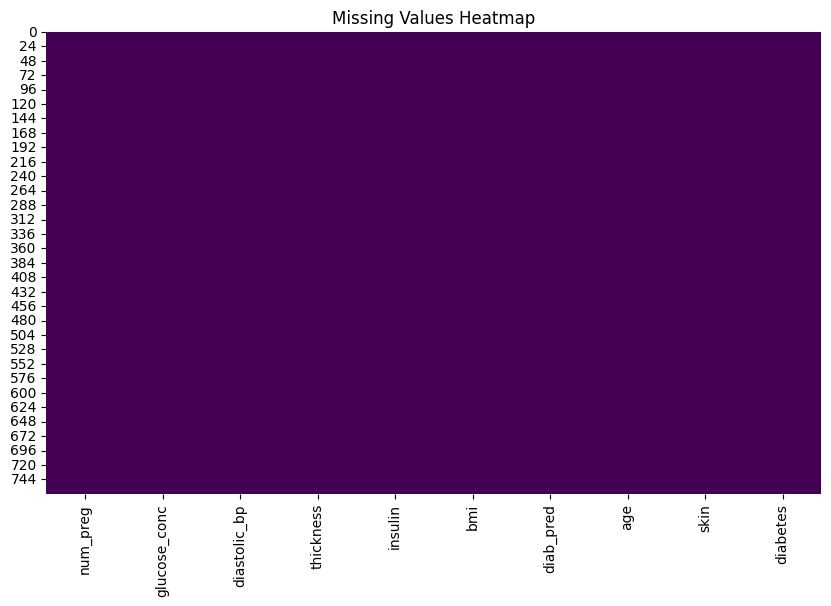

In [ ]:
#missing value
print("Missing values per column:")
print(df.isnull().sum())


plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
print("Shape before dropping 'skin':", df.shape)
df.drop('skin', axis=1, inplace=True)
print("Shape after dropping 'skin':", df.shape)

df.head()


Shape before dropping 'skin': (768, 10)
Shape after dropping 'skin': (768, 9)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [ ]:

print("Unique values in 'diabetes' before mapping:", df['diabetes'].unique())


df['diabetes'] = df['diabetes'].map({True: 1, False: 0})

print("Unique values in 'diabetes' after mapping:", df['diabetes'].unique())


df['diabetes'].value_counts()


Unique values in 'diabetes' before mapping: [ True False]
Unique values in 'diabetes' after mapping: [1 0]


,count
diabetes,
0,500
1,268


In [ ]:

scaler = StandardScaler()

features = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

df[features] = scaler.fit_transform(df[features])
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Class distribution before SMOTE:
diabetes
0    500
1    268
Name: count, dtype: int64

Class distribution after SMOTE:
diabetes
1    500
0    500
Name: count, dtype: int64


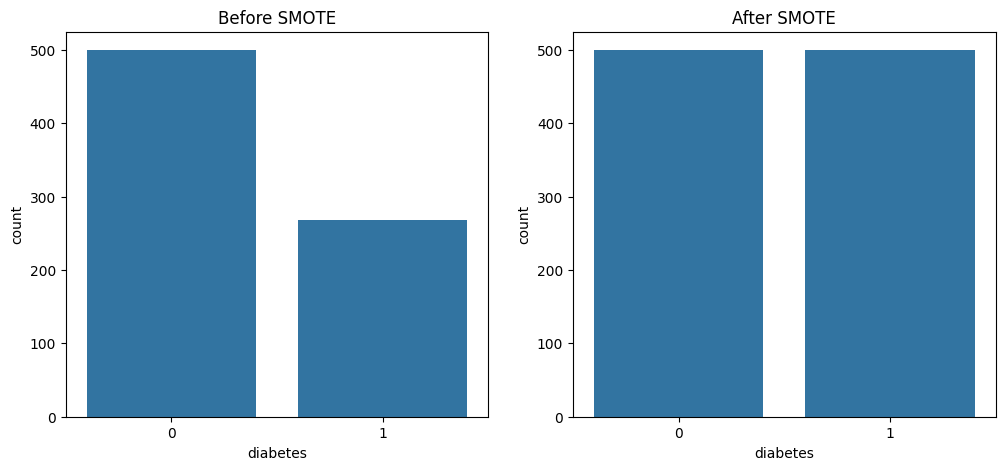

In [ ]:
print("Class distribution before SMOTE:")
print(df['diabetes'].value_counts())

# SMOTE for oversampling
X, y = df.drop('diabetes', axis=1), df['diabetes']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.countplot(x=y, ax=ax[0])
ax[0].set_title("Before SMOTE")

# After SMOTE
sns.countplot(x=y_resampled, ax=ax[1])
ax[1].set_title("After SMOTE")

plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (600, 8) (600,)
Testing set shape: (400, 8) (400,)


In [ ]:
preprocessed_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='diabetes')], axis=1)
preprocessed_df.to_csv("preprocessed_pima.csv", index=False)
print("Preprocessed data saved as 'preprocessed_pima.csv'")


Preprocessed data saved as 'preprocessed_pima.csv'


In [ ]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Metrics
    metrics = {
        'accuracy_score': accuracy_score(y_test, y_pred),
        'precision_score': precision_score(y_test, y_pred),
        'recall_score': recall_score(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'roc_auc_score': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None,
        'balanced_accuracy_score': balanced_accuracy_score(y_test, y_pred),
        'average_precision_score': average_precision_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

    # Display metrics
    print(f"\n{model_name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}" if value is not None else f"{metric}: N/A")
    for metric, value in metrics.items():
            if metric not in res_dic:
                res_dic[metric] = {}
            res_dic[metric][model_name] = value

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

    print("")
    # ROC curve
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})', color='blue')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend()
        plt.show()

        return auc_score
    else:
        return None



--- SVM ---

SVM Metrics:
accuracy_score: 0.7775
precision_score: 0.7477
recall_score: 0.8274
f1_score: 0.7855
roc_auc_score: 0.8360
balanced_accuracy_score: 0.7782
average_precision_score: 0.8040


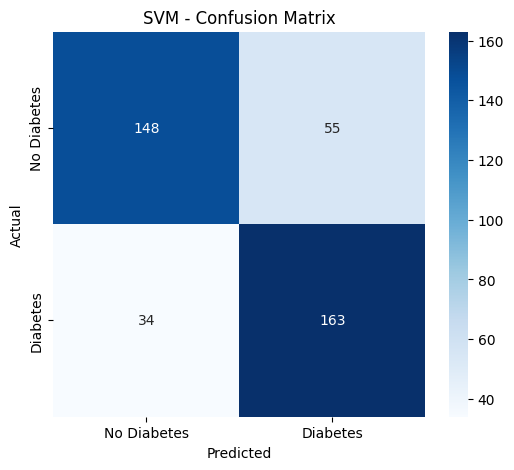

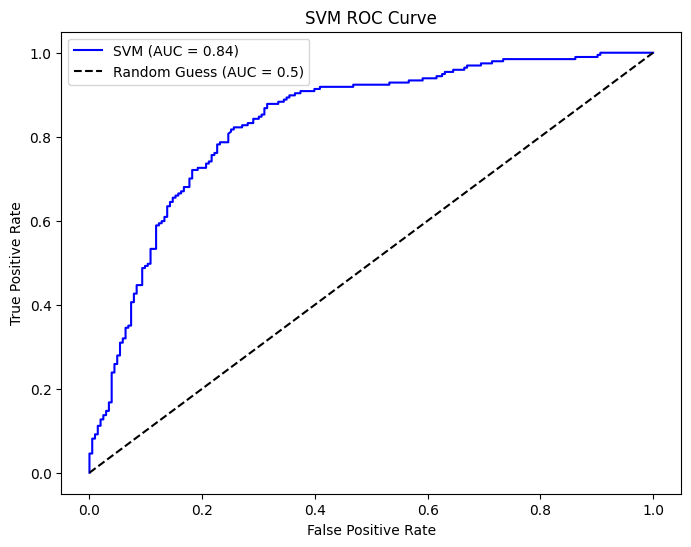

In [ ]:
from sklearn.svm import SVC

print("\n--- SVM ---")
svm_model = SVC(probability=True, random_state=42)
svm_auc = evaluate_model(svm_model, "SVM")



--- Random Forest ---

Random Forest Metrics:
accuracy_score: 0.7925
precision_score: 0.7664
recall_score: 0.8325
f1_score: 0.7981
roc_auc_score: 0.8591
balanced_accuracy_score: 0.7931
average_precision_score: 0.8401


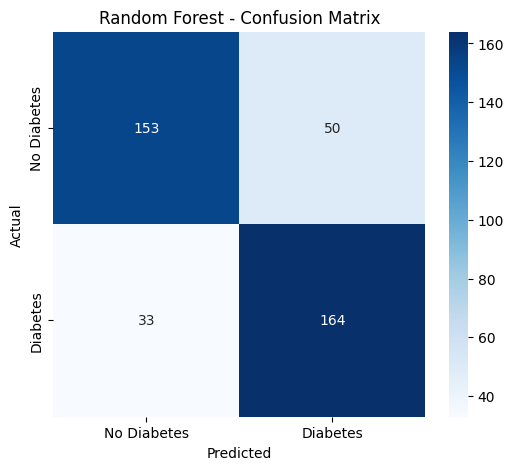

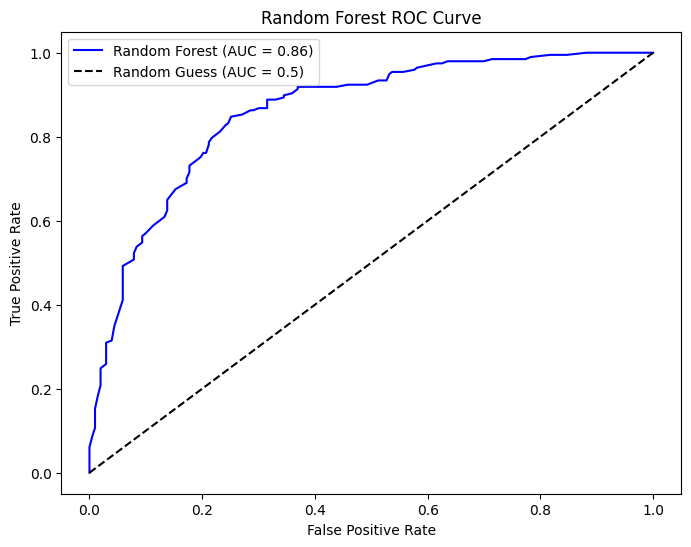

In [ ]:
from sklearn.ensemble import RandomForestClassifier
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(random_state=42)
rf_auc = evaluate_model(rf_model, "Random Forest")



--- Logistic Regression ---

Logistic Regression Metrics:
accuracy_score: 0.7425
precision_score: 0.7398
recall_score: 0.7360
f1_score: 0.7379
roc_auc_score: 0.8250
balanced_accuracy_score: 0.7424
average_precision_score: 0.8061


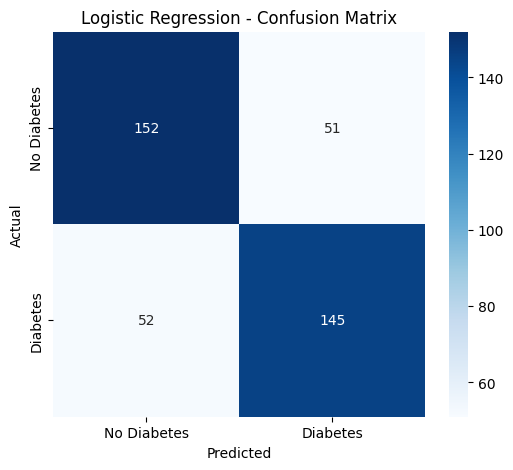

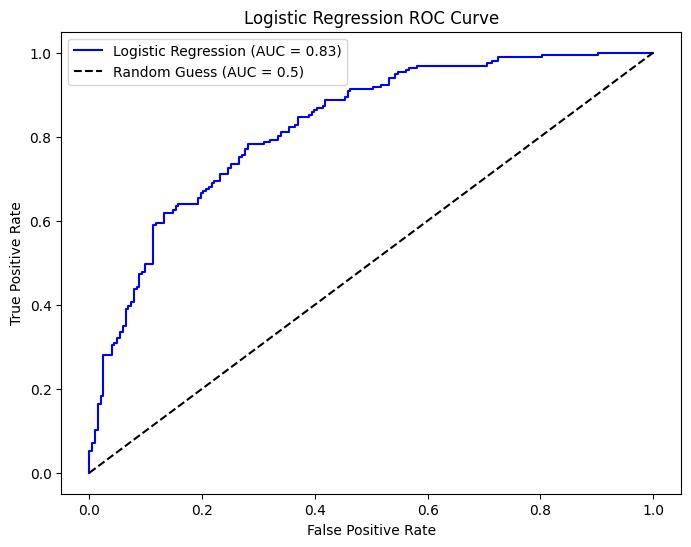

In [ ]:
from sklearn.linear_model import LogisticRegression

print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(random_state=42)
lr_auc = evaluate_model(lr_model, "Logistic Regression")



--- XGBoost ---

XGBoost Metrics:
accuracy_score: 0.7550
precision_score: 0.7281
recall_score: 0.8020
f1_score: 0.7633
roc_auc_score: 0.8207
balanced_accuracy_score: 0.7557
average_precision_score: 0.7720


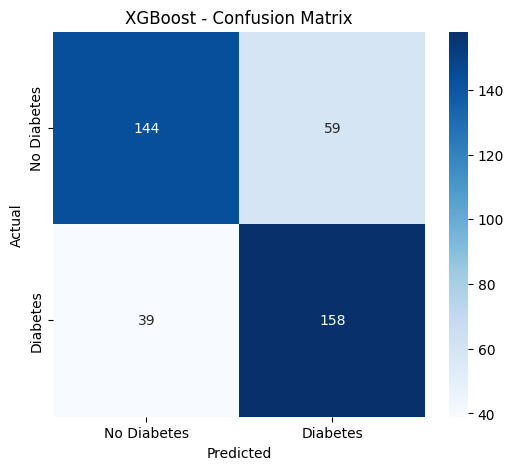

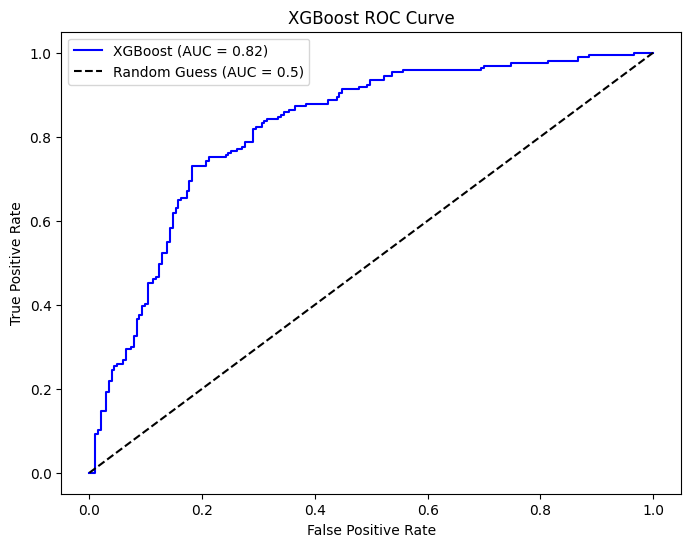

In [ ]:
from xgboost import XGBClassifier

print("\n--- XGBoost ---")
xgb_model = XGBClassifier(random_state=42)
xgb_auc = evaluate_model(xgb_model, "XGBoost")



--- KNN ---

KNN Metrics:
accuracy_score: 0.7600
precision_score: 0.7186
recall_score: 0.8426
f1_score: 0.7757
roc_auc_score: 0.8105
balanced_accuracy_score: 0.7612
average_precision_score: 0.7437


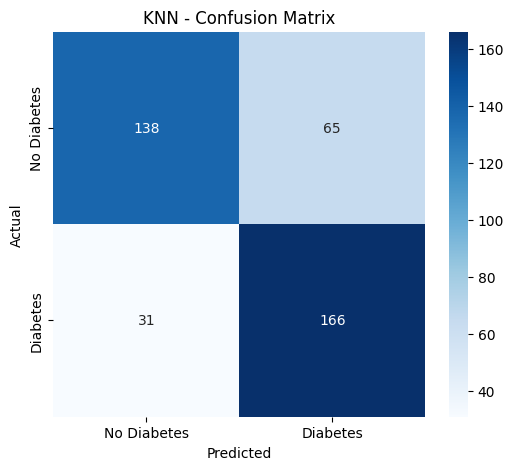

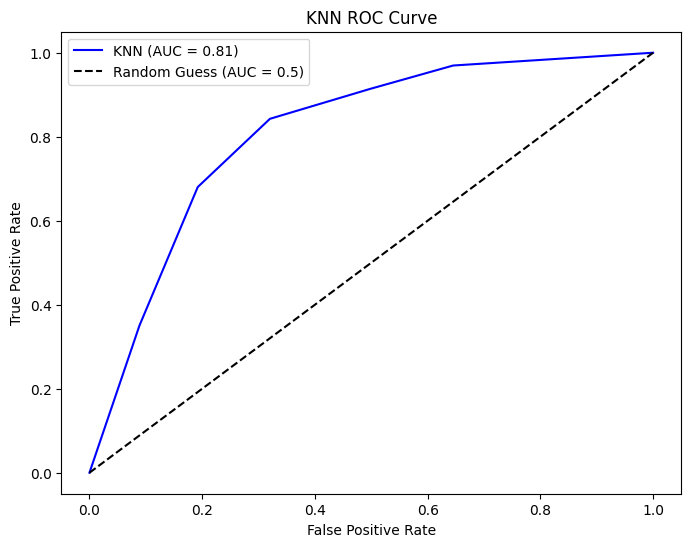

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

print("\n--- KNN ---")
knn_model = KNeighborsClassifier()
knn_auc = evaluate_model(knn_model, "KNN")



--- Decision Tree ---

Decision Tree Metrics:
accuracy_score: 0.7050
precision_score: 0.6771
recall_score: 0.7665
f1_score: 0.7190
roc_auc_score: 0.7059
balanced_accuracy_score: 0.7059
average_precision_score: 0.6340


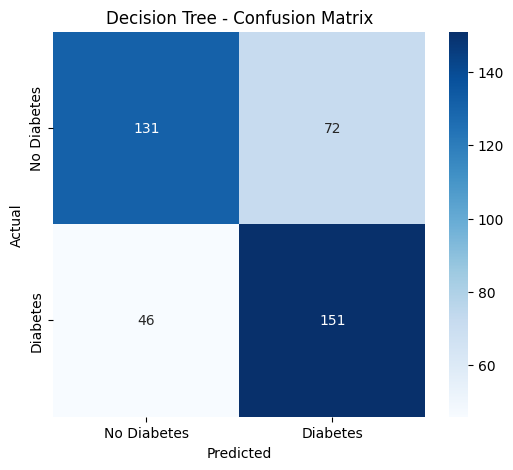

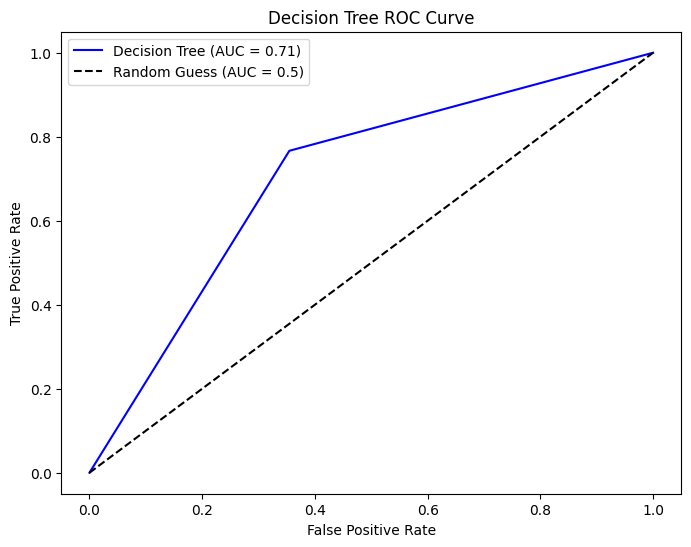

In [ ]:
from sklearn.tree import DecisionTreeClassifier

print("\n--- Decision Tree ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_auc = evaluate_model(dt_model, "Decision Tree")



--- Naive Bayes ---

Naive Bayes Metrics:
accuracy_score: 0.7250
precision_score: 0.7326
recall_score: 0.6954
f1_score: 0.7135
roc_auc_score: 0.8017
balanced_accuracy_score: 0.7246
average_precision_score: 0.7529


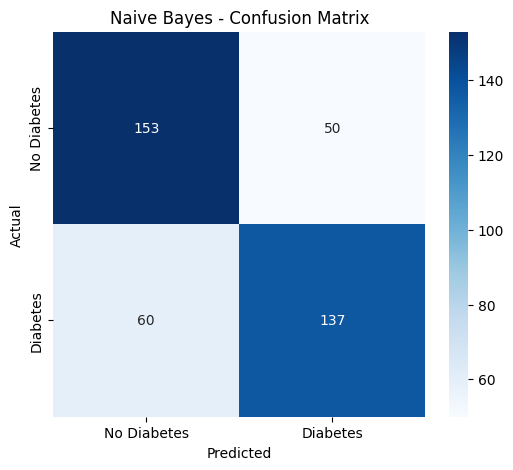

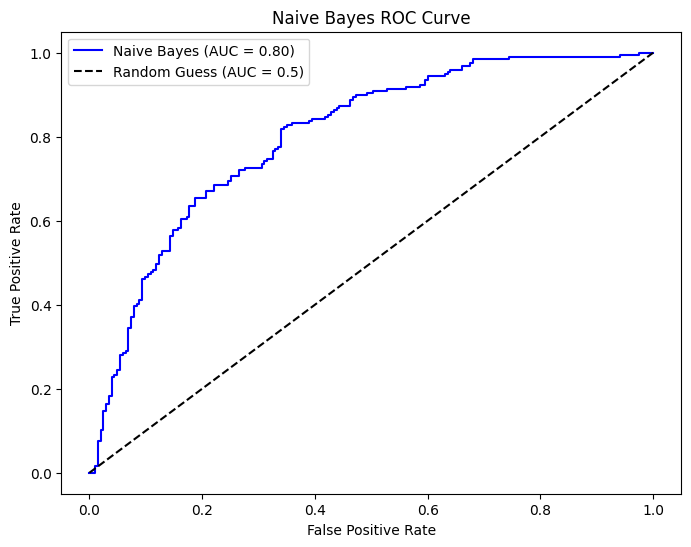

In [ ]:
from sklearn.naive_bayes import GaussianNB

print("\n--- Naive Bayes ---")
nb_model = GaussianNB()
nb_auc = evaluate_model(nb_model, "Naive Bayes")



--- Neural Network ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

--- Neural Network Metrics ---
accuracy_score: 0.7375
precision_score: 0.7072
recall_score: 0.7970
f1_score: 0.7494
roc_auc_score: 0.8249
balanced_accuracy_score: 0.7384
average_precision_score: 0.8085


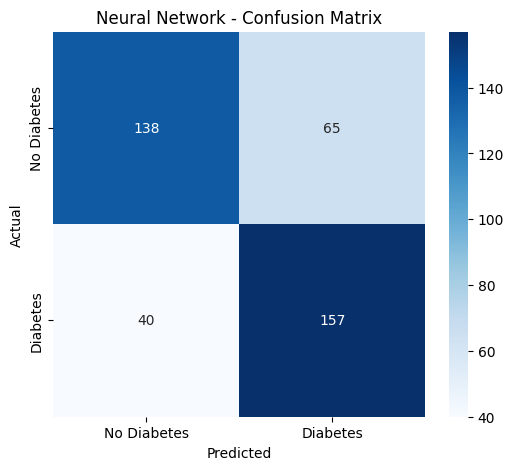

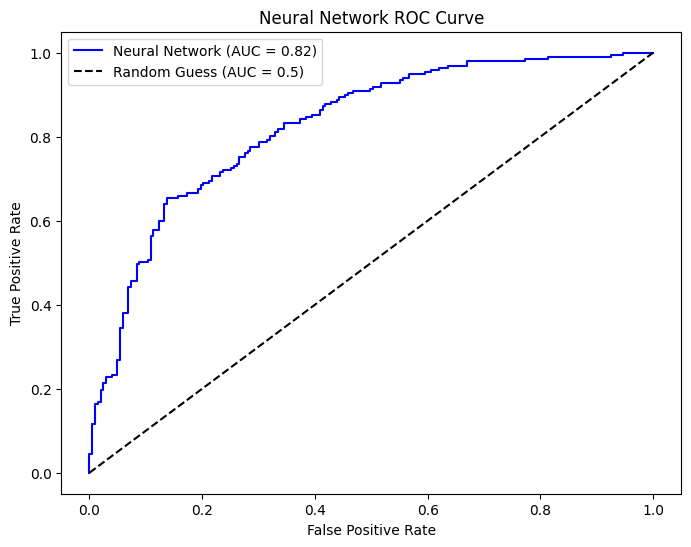

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score, average_precision_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#Neural Network Model
print("\n--- Neural Network ---")

# Neural Network architecture
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)


nn_pred_proba = nn_model.predict(X_test).flatten()  # Get predicted probabilities
nn_pred = (nn_pred_proba > 0.5).astype("int32")     # Convert to binary predictions

# all Metrics
nn_metrics = {
    'accuracy_score': accuracy_score(y_test, nn_pred),
    'precision_score': precision_score(y_test, nn_pred),
    'recall_score': recall_score(y_test, nn_pred),
    'f1_score': f1_score(y_test, nn_pred),
    'roc_auc_score': roc_auc_score(y_test, nn_pred_proba),
    'balanced_accuracy_score': balanced_accuracy_score(y_test, nn_pred),
    'average_precision_score': average_precision_score(y_test, nn_pred_proba)
}

print("\n--- Neural Network Metrics ---")
for metric, value in nn_metrics.items():
    print(f"{metric}: {value:.4f}")
for metric, value in nn_metrics.items():
    if metric not in res_dic:
        res_dic[metric] = {}
    res_dic[metric]["Neural network"] = value
#cm
cm = confusion_matrix(y_test, nn_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network - Confusion Matrix')
plt.show()

print("")

#roc
fpr, tpr, _ = roc_curve(y_test, nn_pred_proba)
nn_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {nn_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curve')
plt.legend()
plt.show()


--- Voting Classifier ---

Voting Classifier Metrics:
accuracy_score: 0.7925
precision_score: 0.7615
recall_score: 0.8426
f1_score: 0.8000
roc_auc_score: 0.8499
balanced_accuracy_score: 0.7932
average_precision_score: 0.8215


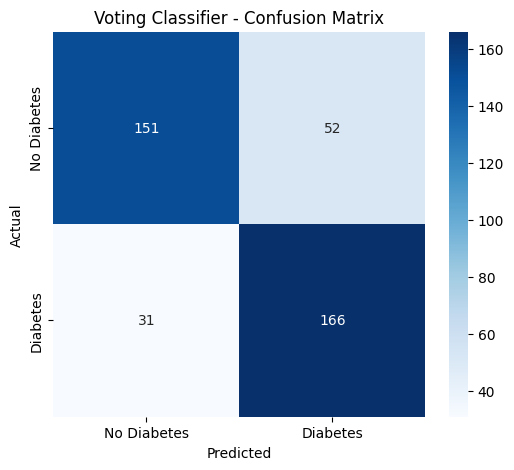

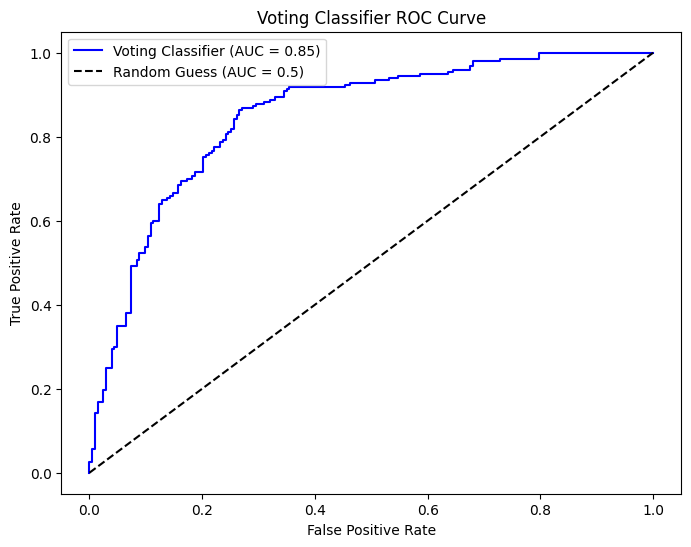

In [ ]:
# prompt: add voting classifier and evaluate it

from sklearn.ensemble import VotingClassifier

# Create a voting classifier with the individual models
voting_classifier = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rf', rf_model),
    ('lr', lr_model),
    ('xgb', xgb_model),
    ('knn', knn_model),
    ('dt', dt_model),
    ('nb', nb_model),
], voting='soft')  # Use 'soft' for probability-based voting

# Evaluate the Voting Classifier
print("\n--- Voting Classifier ---")
voting_auc = evaluate_model(voting_classifier, "Voting Classifier")



--- Stacking Classifier ---

Stacking Classifier Metrics:
accuracy_score: 0.8000
precision_score: 0.7721
recall_score: 0.8426
f1_score: 0.8058
roc_auc_score: 0.8564
balanced_accuracy_score: 0.8006
average_precision_score: 0.8360


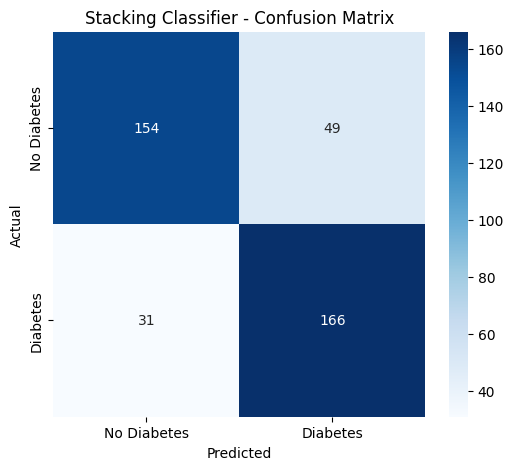

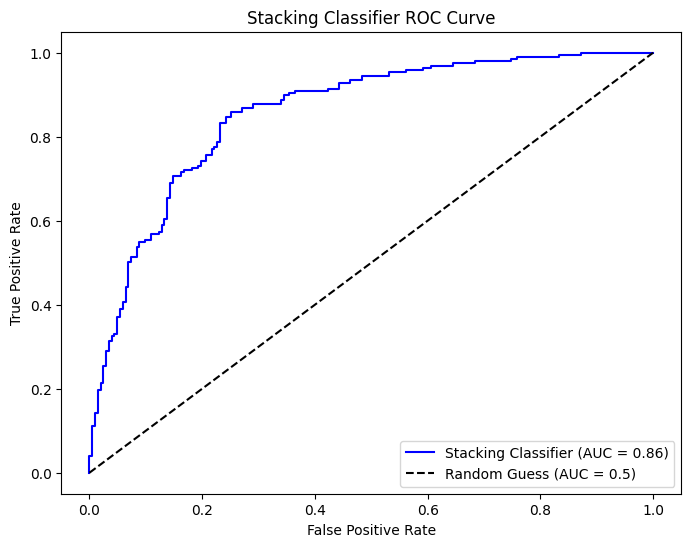

In [ ]:
# prompt: add stacking classifier and evaluate it

# Create a stacking classifier with the individual models
from sklearn.ensemble import StackingClassifier

estimators = [
    ('svm', svm_model),
    ('rf', rf_model),
    ('lr', lr_model),
    ('xgb', xgb_model),
    ('knn', knn_model),
    ('dt', dt_model),
    ('nb', nb_model),
]

# Use Logistic Regression as the final estimator for stacking
final_estimator = LogisticRegression()

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Evaluate the Stacking Classifier
print("\n--- Stacking Classifier ---")
stacking_auc = evaluate_model(stacking_classifier, "Stacking Classifier")


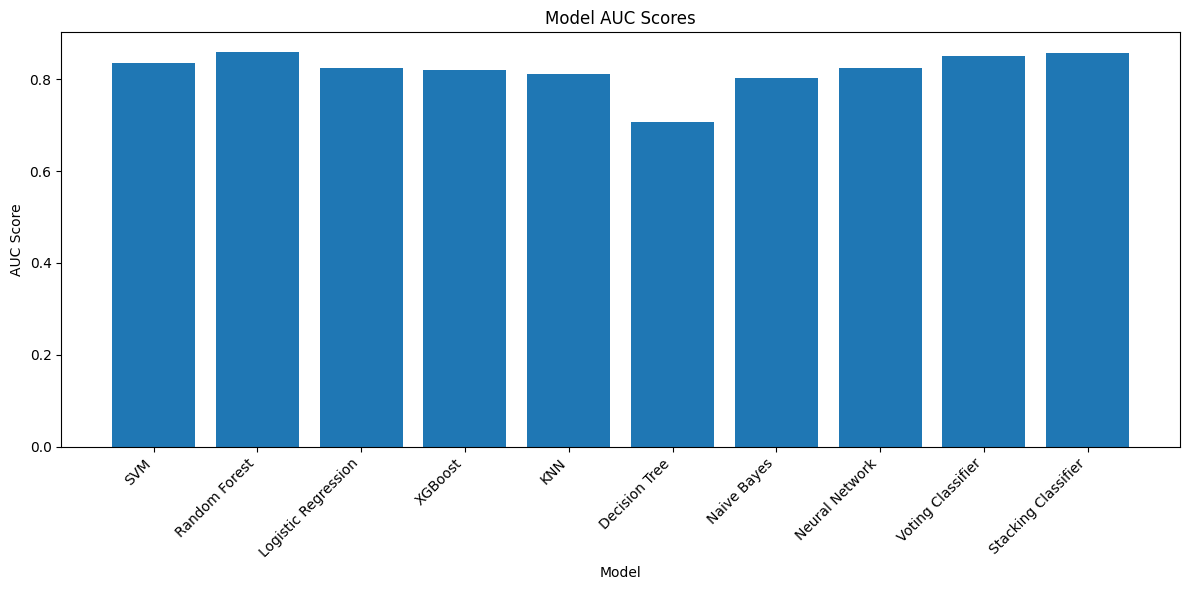

In [ ]:
# prompt: show all the model aud scores as barchart

import matplotlib.pyplot as plt
auc_scores = {
    "SVM": svm_auc,
    "Random Forest": rf_auc,
    "Logistic Regression": lr_auc,
    "XGBoost": xgb_auc,
    "KNN": knn_auc,
    "Decision Tree": dt_auc,
    "Naive Bayes": nb_auc,
    "Neural Network": nn_auc,
    "Voting Classifier": voting_auc,
    "Stacking Classifier": stacking_auc
}

# Remove models that do not have an AUC score
auc_scores = {k: v for k, v in auc_scores.items() if v is not None}


plt.figure(figsize=(12, 6))
plt.bar(auc_scores.keys(), auc_scores.values())
plt.xlabel("Model")
plt.ylabel("AUC Score")
plt.title("Model AUC Scores")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
from tabulate import tabulate
results_df = pd.DataFrame(res_dic)
print("\n Metrics Table")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))



 Metrics Table
╒═════════════════════╤══════════════════╤═══════════════════╤════════════════╤════════════╤═════════════════╤═══════════════════════════╤═══════════════════════════╕
│                     │   accuracy_score │   precision_score │   recall_score │   f1_score │   roc_auc_score │   balanced_accuracy_score │   average_precision_score │
╞═════════════════════╪══════════════════╪═══════════════════╪════════════════╪════════════╪═════════════════╪═══════════════════════════╪═══════════════════════════╡
│ SVM                 │           0.7775 │          0.747706 │       0.827411 │   0.785542 │        0.836001 │                  0.778238 │                  0.803962 │
├─────────────────────┼──────────────────┼───────────────────┼────────────────┼────────────┼─────────────────┼───────────────────────────┼───────────────────────────┤
│ Random Forest       │           0.7925 │          0.766355 │       0.832487 │   0.798054 │        0.859081 │                  0.793091 │           